In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('dataset/diabetes_binary_health_indicators_BRFSS2021.csv')

# Assuming df is your DataFrame and "Diabetes_binary" is your target column
class_0 = df[df.Diabetes_binary == 0]
class_1 = df[df.Diabetes_binary == 1]

# Downsample class 0 to match the number of instances in class 1
class_0_downsampled = class_0.sample(len(class_1))

# Concatenate the downsampled class 0 with class 1
balanced_df = pd.concat([class_0_downsampled, class_1], axis=0)

# Now, balanced_df is your balanced DataFrame

X = balanced_df.drop("Diabetes_binary", axis=1)
y = balanced_df["Diabetes_binary"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

balanced_df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
71108,0.0,0,0.0,1,21.0,1.0,0.0,0.0,1,0,1,0,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,7.0
77812,0.0,0,1.0,1,18.0,1.0,0.0,0.0,1,0,1,0,1,0.0,4.0,25.0,10.0,0.0,0,6,6.0,9.0
41589,0.0,0,0.0,1,25.0,0.0,0.0,0.0,1,0,1,0,1,0.0,2.0,7.0,0.0,0.0,0,2,4.0,6.0
138850,0.0,0,0.0,1,25.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,1.0,2.0,0.0,0,6,6.0,8.0
56954,0.0,0,0.0,1,28.0,0.0,0.0,0.0,1,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0,7,5.0,10.0


In [22]:
from gan import CTGAN

real_data = balanced_df

# Names of the columns that are discrete
discrete_columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(1000)

In [23]:
synthetic_data.head(100)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,0.0,1,33.0,0.0,0.0,0.0,1,0,1,0,1,0.0,5.0,0.0,3.0,0.0,0,5,6.0,7.0
1,1.0,1,1.0,1,35.0,1.0,0.0,0.0,0,0,0,0,1,0.0,4.0,0.0,30.0,1.0,1,13,5.0,4.0
2,0.0,0,0.0,1,28.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,2.0,0.0,0.0,0,3,6.0,6.0
3,0.0,0,0.0,1,24.0,0.0,0.0,0.0,0,0,1,1,1,0.0,5.0,0.0,0.0,0.0,0,5,6.0,8.0
4,1.0,1,1.0,1,27.0,1.0,0.0,1.0,0,0,0,0,1,0.0,4.0,30.0,30.0,1.0,1,6,4.0,5.0
5,1.0,1,1.0,1,30.0,0.0,1.0,0.0,0,1,1,0,1,0.0,4.0,30.0,30.0,0.0,1,5,3.0,10.0
6,0.0,0,0.0,1,34.0,1.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,2.0,0.0,1,7,2.0,6.0
7,1.0,0,0.0,1,77.0,1.0,0.0,0.0,0,1,1,0,0,0.0,4.0,0.0,0.0,0.0,0,10,4.0,7.0
8,0.0,0,1.0,1,26.0,0.0,0.0,0.0,1,0,1,0,1,0.0,3.0,0.0,5.0,0.0,0,5,5.0,9.0
9,1.0,1,1.0,1,21.0,0.0,0.0,0.0,0,0,1,1,1,0.0,3.0,0.0,0.0,1.0,1,13,4.0,6.0


c:\Users\Tarik\Desktop\Diabetes-Prediction\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Tarik\Desktop\Diabetes-Prediction\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Logistic Regression:
  Accuracy on real data: 0.7354781054512958
  Accuracy on synthetic data: 0.79
Naive Bayes:
  Accuracy on real data: 0.7157432231158772
  Accuracy on synthetic data: 0.78
Random Forest:
  Accuracy on real data: 0.7345099791480488
  Accuracy on synthetic data: 0.755
K-Nearest Neighbors:
  Accuracy on real data: 0.6942955019362526
  Accuracy on synthetic data: 0.685
Decision Tree:
  Accuracy on real data: 0.6477509681263033
  Accuracy on synthetic data: 0.7


c:\Users\Tarik\Desktop\Diabetes-Prediction\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


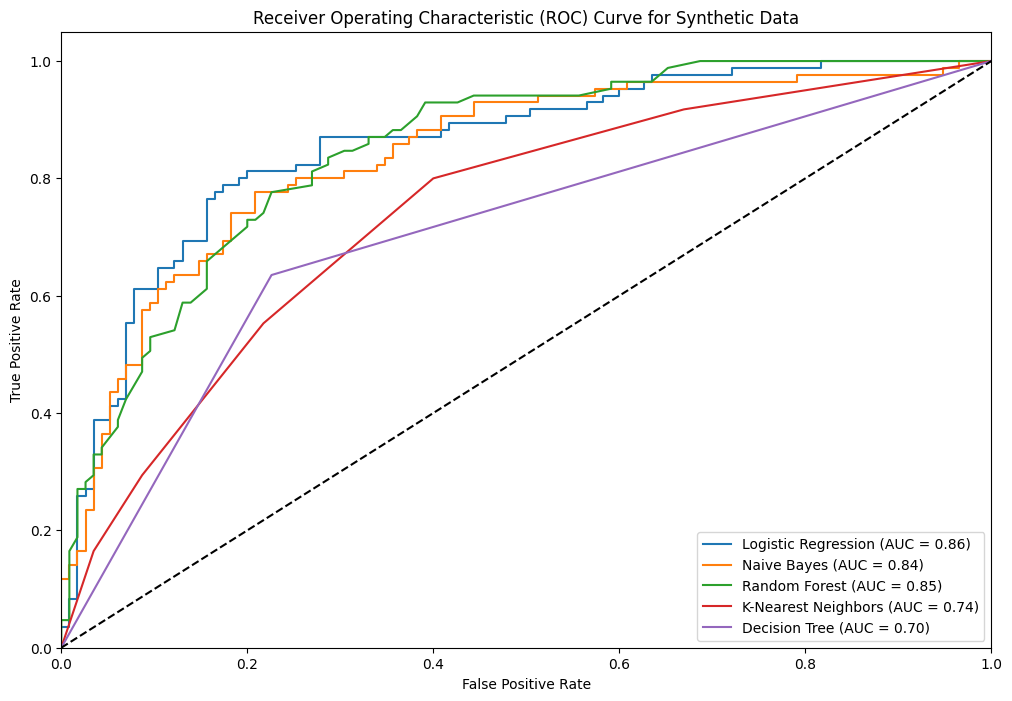

c:\Users\Tarik\Desktop\Diabetes-Prediction\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


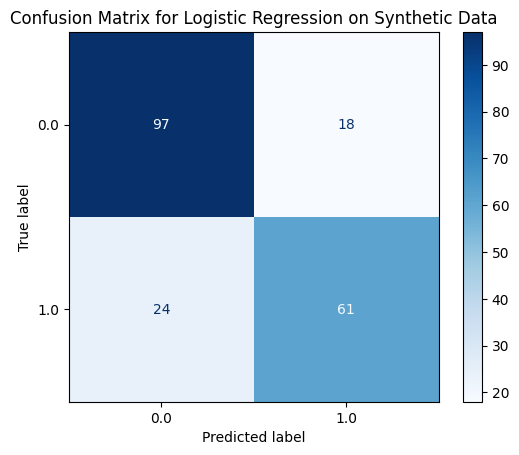

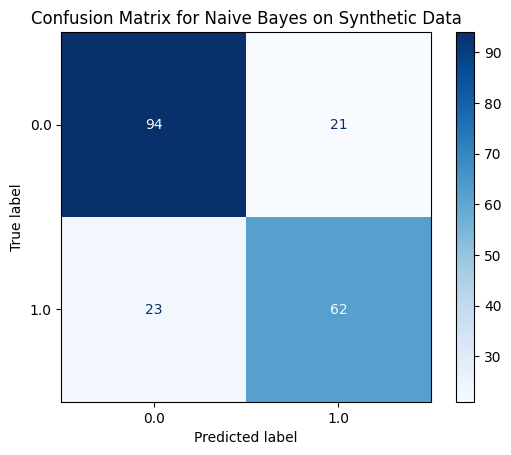

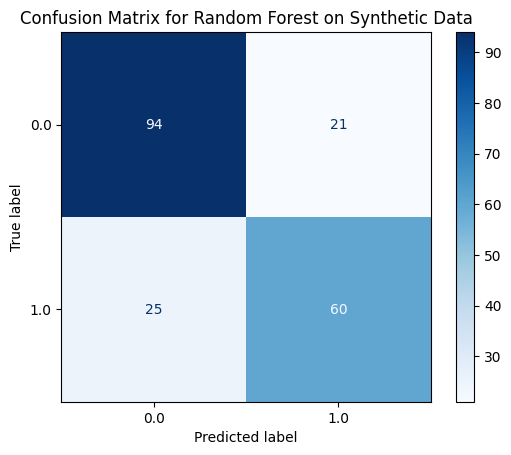

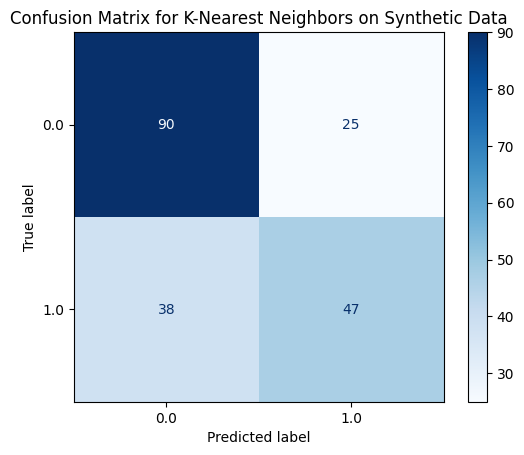

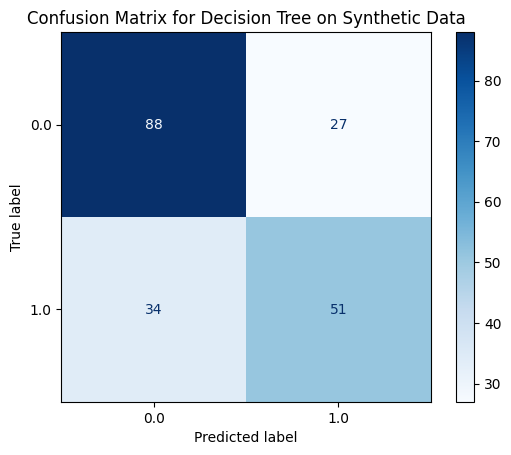

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


X_real = real_data.drop('Diabetes_binary', axis=1)
y_real = real_data['Diabetes_binary']

X_synthetic = synthetic_data.drop('Diabetes_binary', axis=1)
y_synthetic = synthetic_data['Diabetes_binary']

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier())
]

for name, model in models:
    model.fit(X_train_real, y_train_real)
    y_pred_real = model.predict(X_test_real)
    accuracy_real = accuracy_score(y_test_real, y_pred_real)
    
    model.fit(X_train_synthetic, y_train_synthetic)
    y_pred_synthetic = model.predict(X_test_synthetic)
    accuracy_synthetic = accuracy_score(y_test_synthetic, y_pred_synthetic)
    
    print(f"{name}:")
    print(f"  Accuracy on real data: {accuracy_real}")
    print(f"  Accuracy on synthetic data: {accuracy_synthetic}")

plt.figure(figsize=(12, 8))

for name, model in models:
    model.fit(X_train_synthetic, y_train_synthetic)
    
    y_proba_synthetic = model.predict_proba(X_test_synthetic)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test_synthetic, y_proba_synthetic)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Synthetic Data')
plt.legend(loc="lower right")
plt.show()

# Plotting confusion matrix for each model on synthetic data
for name, model in models:
    # Train the model on synthetic data
    model.fit(X_train_synthetic, y_train_synthetic)
    
    # Predict on synthetic test data
    y_pred_synthetic = model.predict(X_test_synthetic)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_synthetic, y_pred_synthetic)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name} on Synthetic Data')
    plt.show()